# United State Crop Acreage and Export Comparison for the Top Four Export Crops of 2019

Using the visualization and analysis of the blogger Jayson Lusk as a starting point, I was inspired to do a furthers analysis on the subject of US cash crops and major exports over time. This interest stems from the US's long time, prominent position as a top exporter for certain crops and how that is impacted implicitly by demand from it's customers. To extend Jayson's analysis I raised the questions:

*Are US farmers determining how many acres of each crop to plant one year out or multiple years out? Does their change in planting acreage reflect similar drops or increases in export data?*

My initial thought was it was decoupled and they were only deciding based on other economic factors. So to truly analysis these questions I decided to take USDA data on four crops and analytically determine the deltas year over year and compare to the export data year over year. 

The following thoguht process led to the following analysis:

- Is the harvest acreage data useful for predictions?
    - I initially thought that beacuse all exports are derived from the total harvested this woudl be a really informative piece of information. Hoever, by using the harvested acreage as a comparison a number of unintended variables are introcued that make it more difficult to deduce the exact impact of just export data on planning decisions. The harvest data is still useful for seeing the total yield and how successful a particular planting season was, but that was outside the scope of this assessment. 
- Can I reduce the outcome of these datasets to a single variable and reduce the dimensionality as much as possible?
    - This required a number of pivots, splits, and concatenations on the found datasets. Ultimately by pivoting and spliting the sets it was possible to tidy up all data to lower dimensionality for multiple interesting varibales including: action, crop, and year.
    
The following noteboook shows the thorught process through draft visualizations and cleaning steps to get to the final outcome. 

## Cleaning the crop farming data

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re


In [21]:
'''
Can I create a time series plot of the changes in acreage over time for
for all available data for teh four crops of interest to this study? The four
crops are: cotton, soybeans, corn, wheat.
'''

data_files = ['./cotton_harvested_planted.csv', './soybeans_harvested_planted.csv', 
		'./wheat_harvested_planted.csv', './corn_grain_harvested_planted.csv']


'''
Read in all data sets and drop unecessary columsn that were irrelevant to this
study.
'''
df = pd.read_csv('./cotton_harvested_planted.csv')
df.drop(columns=['Week Ending', 'Geo Level', 'State', 'State ANSI',
       'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code',
       'Region', 'watershed_code', 'Watershed', 'Domain', 'Domain Category', 
	   'Period', 'Program', 'COTTON - ACRES PLANTED  -  <b>CV (%)</b>', 
	   'COTTON - ACRES HARVESTED  -  <b>CV (%)</b>'],axis=1, inplace=True)
df.rename({"COTTON - ACRES HARVESTED  -  <b>VALUE</b>" : "cotton_harvested", 
		"COTTON - ACRES PLANTED  -  <b>VALUE</b>": "cotton_planted"}, axis=1, inplace=True)

df_wheat = pd.read_csv('./wheat_harvested_planted.csv')
df_wheat.drop(columns=['Week Ending', 'Geo Level', 'State', 'State ANSI',
       'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code',
       'Region', 'watershed_code', 'Watershed', 'Domain', 'Domain Category', 
	   'Period', 'Program', 'WHEAT - ACRES PLANTED  -  <b>CV (%)</b>', 
	   'WHEAT - ACRES HARVESTED  -  <b>CV (%)</b>'],axis=1, inplace=True)
df_wheat.rename({"WHEAT - ACRES HARVESTED  -  <b>VALUE</b>" : "wheat_harvested", 
		"WHEAT - ACRES PLANTED  -  <b>VALUE</b>": "wheat_planted"}, axis=1, inplace=True)

df_soy = pd.read_csv('./soybeans_harvested_planted.csv')
df_soy.drop(columns=['Week Ending', 'Geo Level', 'State', 'State ANSI',
       'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code',
       'Region', 'watershed_code', 'Watershed', 'Domain', 'Domain Category', 
	   'Period', 'Program', 'SOYBEANS - ACRES PLANTED  -  <b>CV (%)</b>', 
	   'SOYBEANS - ACRES HARVESTED  -  <b>CV (%)</b>'],axis=1, inplace=True)
df_soy.rename({"SOYBEANS - ACRES HARVESTED  -  <b>VALUE</b>" : "soybeans_harvested", 
		"SOYBEANS - ACRES PLANTED  -  <b>VALUE</b>": "soybeans_planted"}, axis=1, inplace=True)

df_corn = pd.read_csv('./corn_grain_harvested_planted.csv')
df_corn.drop(columns=['Week Ending', 'Geo Level', 'State', 'State ANSI',
       'Ag District', 'Ag District Code', 'County', 'County ANSI', 'Zip Code',
       'Region', 'watershed_code', 'Watershed', 'Domain', 'Domain Category', 
	   'Period', 'Program', 'CORN - ACRES PLANTED  -  <b>CV (%)</b>', 
	   'CORN, GRAIN - ACRES HARVESTED  -  <b>CV (%)</b>'],axis=1, inplace=True)
df_corn.rename({"CORN, GRAIN - ACRES HARVESTED  -  <b>VALUE</b>" : "corn_harvested", 
		"CORN - ACRES PLANTED  -  <b>VALUE</b>": "corn_planted"}, axis=1, inplace=True)



With all the data sets for each crop loaded and reduced to only the critical columns of interest it is now posisble to combine the datasets into a single data frame. They all have the same number of columns and share a column for capturing 'year' data. Once joined, the new dataframe was melted so the newly nominal data was categorized by commodity type. This allows for easier spliting and searching becasue all values are tied directly to the type of commoditiy and the action. Each value was also cleaned to drop any special characters. 

In [22]:
'''
Join all data sets
'''
frames=[df,df_soy,df_wheat,df_corn]
full_df = pd.concat(frames,join='outer')
melt_df = pd.melt(full_df, id_vars=['Year','Commodity'],value_vars=['cotton_harvested','cotton_planted',
															'wheat_harvested','wheat_planted',
															'soybeans_harvested','soybeans_planted',
															'corn_harvested','corn_planted'])
'''
Remove special characters and adjust types for columns of interest
'''
melt_df.replace('\,','',regex=True,inplace=True)
melt_df = melt_df.dropna()
melt_df = melt_df.astype({'variable': 'str'})
melt_df = melt_df.astype({'value': 'float'})
print(melt_df.sample(10))

      Year Commodity            variable       value
95    1925    COTTON    cotton_harvested  44386000.0
3932  1867      CORN      corn_harvested  32116000.0
134   1886    COTTON    cotton_harvested  18370000.0
2430  1993  SOYBEANS  soybeans_harvested  57307000.0
631   1951    COTTON      cotton_planted  29353000.0
2968  2017  SOYBEANS    soybeans_planted  90162000.0
4347  2014      CORN        corn_planted  90597000.0
1982  1976     WHEAT       wheat_planted  80395000.0
654   1928    COTTON      cotton_planted  43737000.0
39    1981    COTTON    cotton_harvested  13841200.0


Text(0, 0.5, 'Acreage')

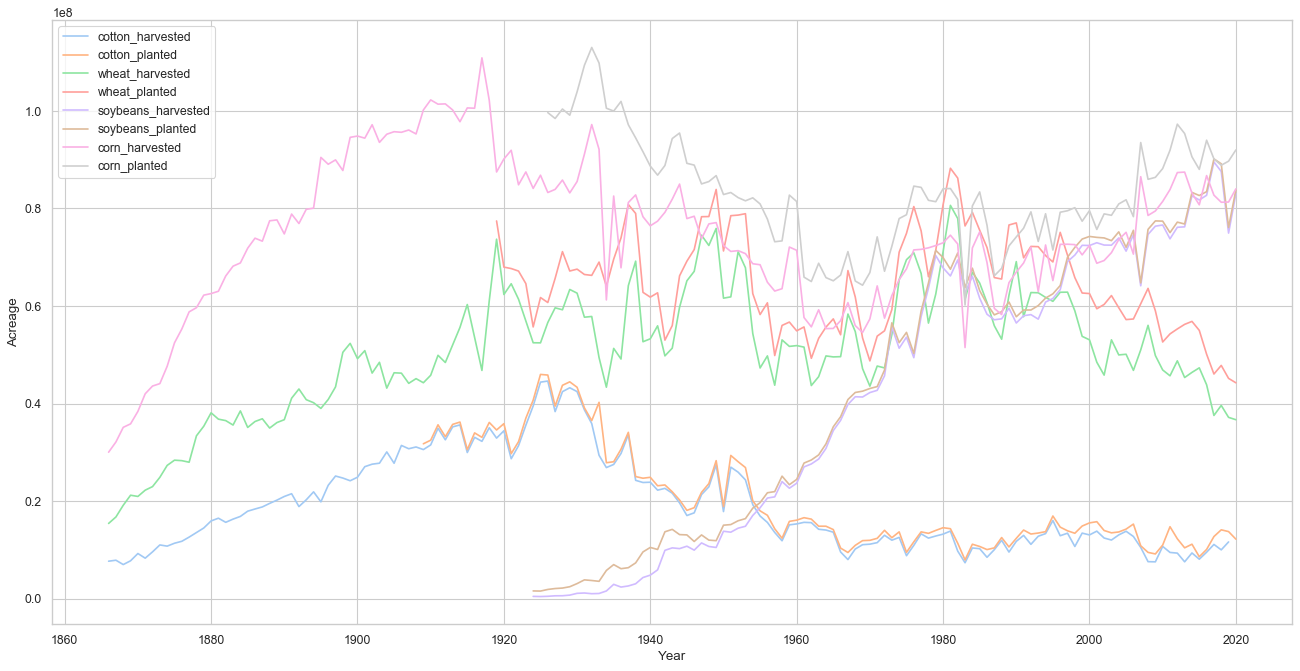

In [23]:
comms = {
	"cot_h":"cotton_harvested",
	"cot_p":"cotton_planted",
	"whe_h":"wheat_harvested",
	"whe_p":"wheat_planted",
	"soy_h":"soybeans_harvested",
	"soy_p":"soybeans_planted",
	"cor_h":"corn_harvested",
	"cor_p":"corn_planted",
}

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
for val in comms.values():
	plt.plot(melt_df.loc[(melt_df.variable == val),['Year']], melt_df.loc[(melt_df.variable == val),['value']],label=val)
plt.legend()
plt.xlabel('Year')
plt.ylabel('Acreage')


With this nominal data it is possible to do an inital time series plot for all commodities. this established a baseline of what exactly we are looking at. The first major observation is that these data sets are not all sized the same. Some crops, like soybeans, did not really start getting farmed until the 1900's and there is a significantly smaller amount of data for that crop than cotton. Even with this first visualization some trends are apparent. For example, the meteoric rise of soybeans being planted and the drop of cotton. 

Are these trends backed up a rise and drop in exports over the same time period? 

Also it can be seent hat the harvested and planted trends for each crop tend to be reflective of each toher and almost exact mirrors just shifted down for harested acreage.

Does the harvested yield impact the planned planted acreage at all?

My assessment at this point is, no. It seems pretty consistent that the tield will be about the same for each year for each crop. Those crops with a larger gap between the planted and harvested acreage might have a higher profit margin that can absord some loss.

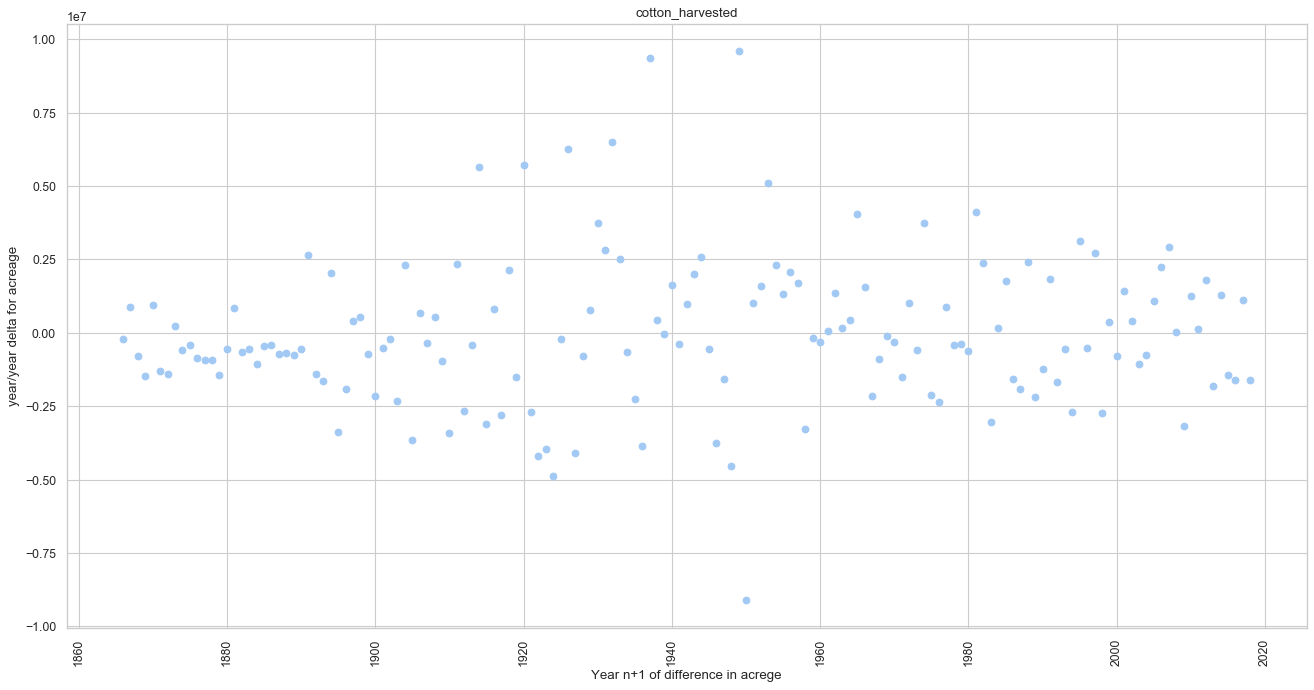

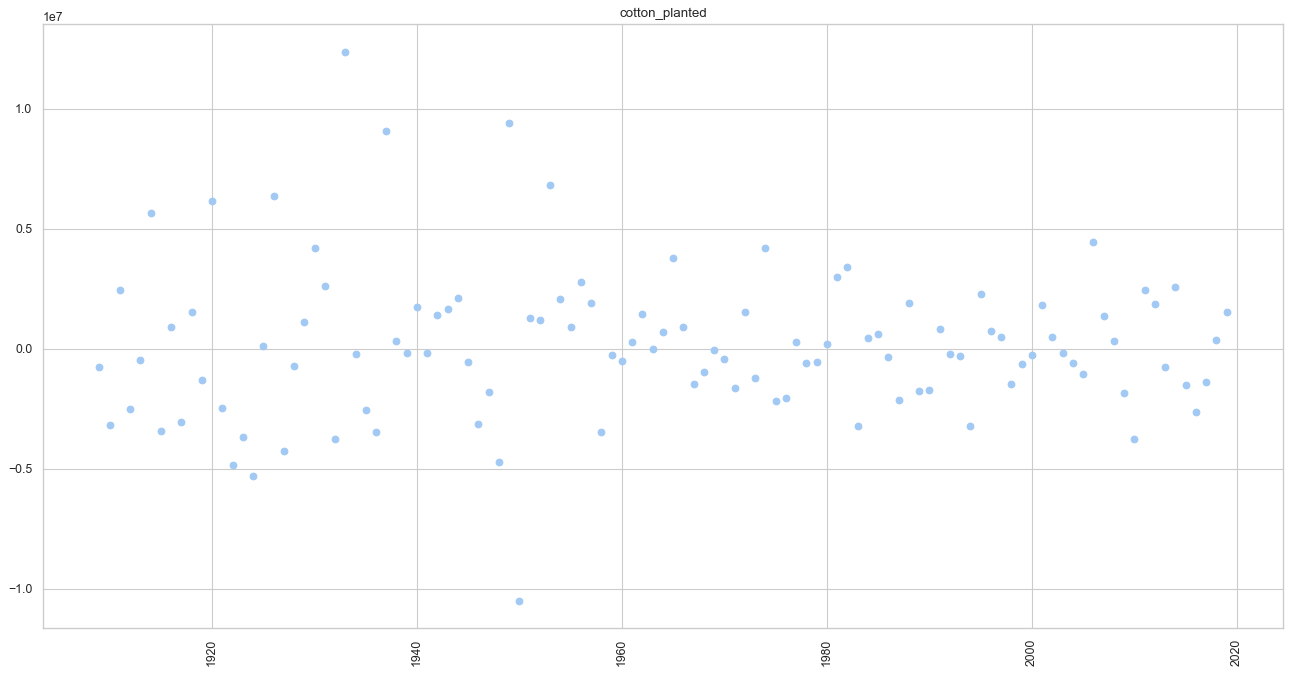

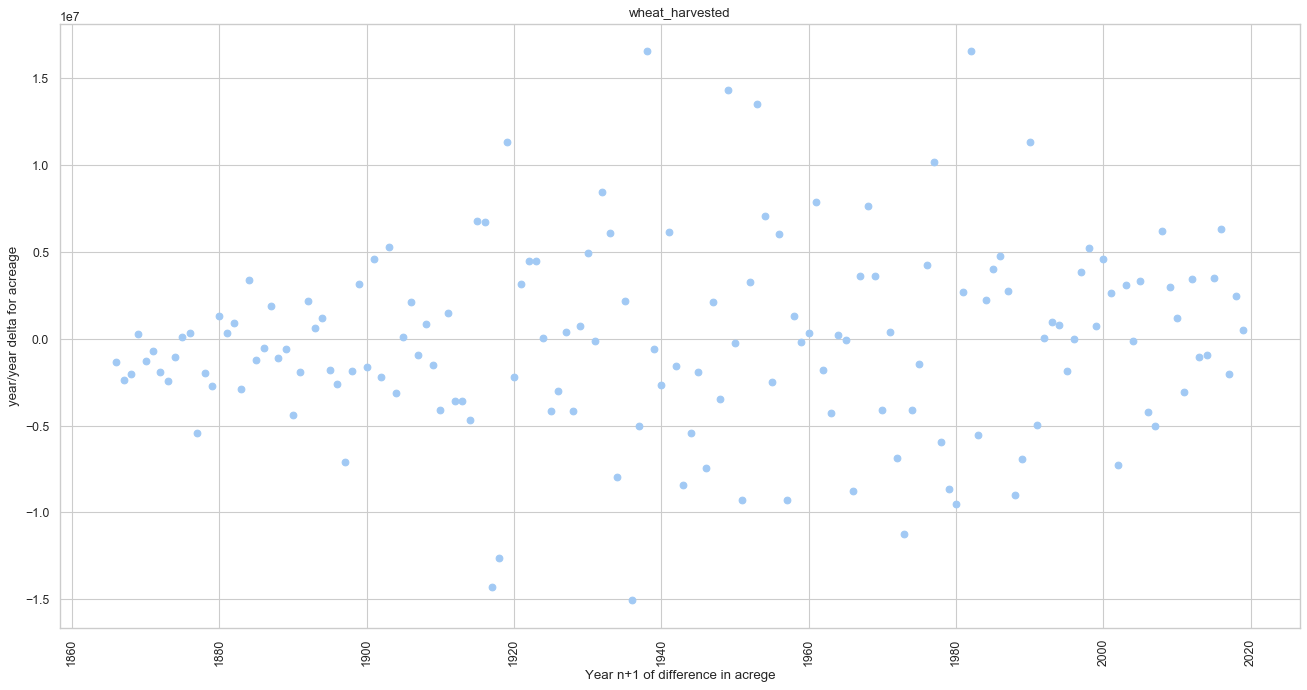

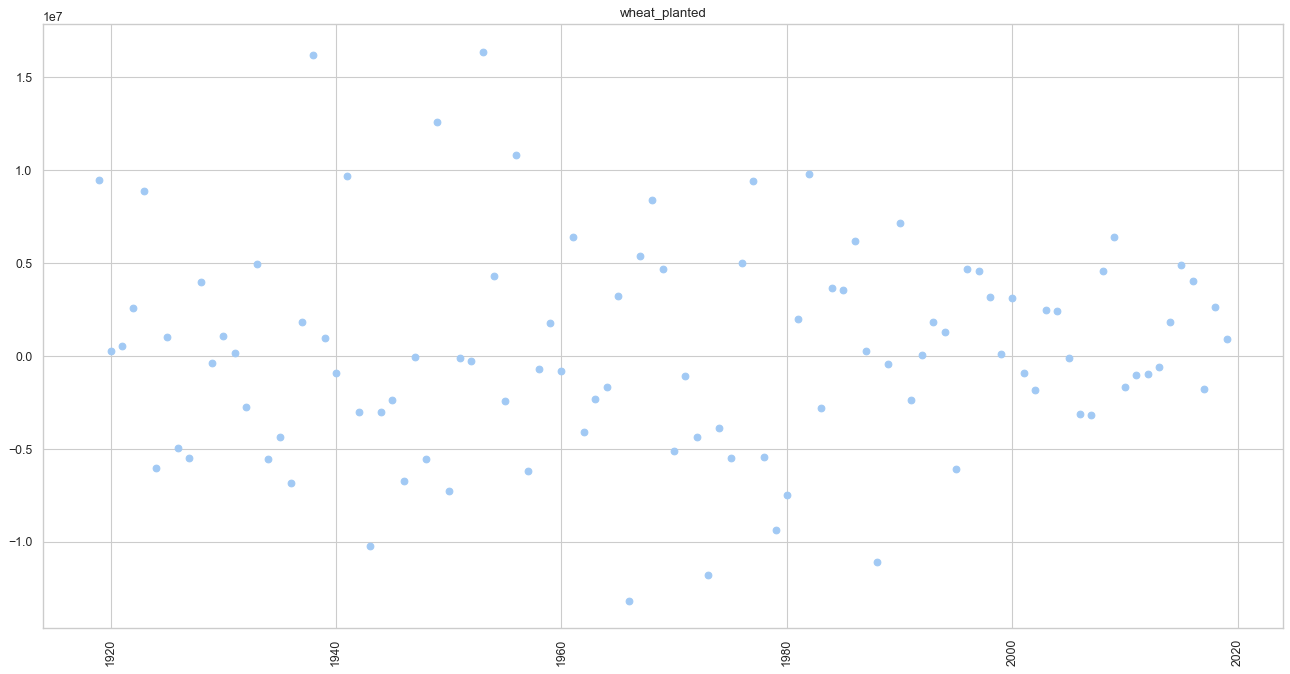

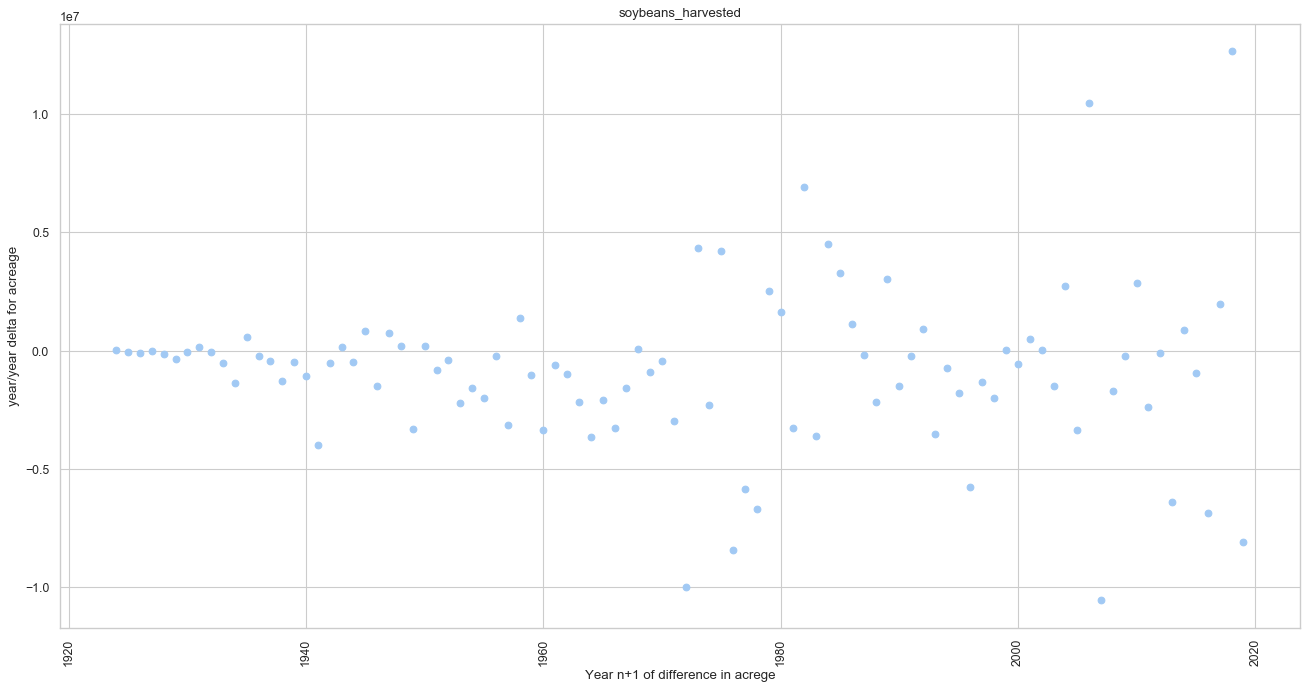

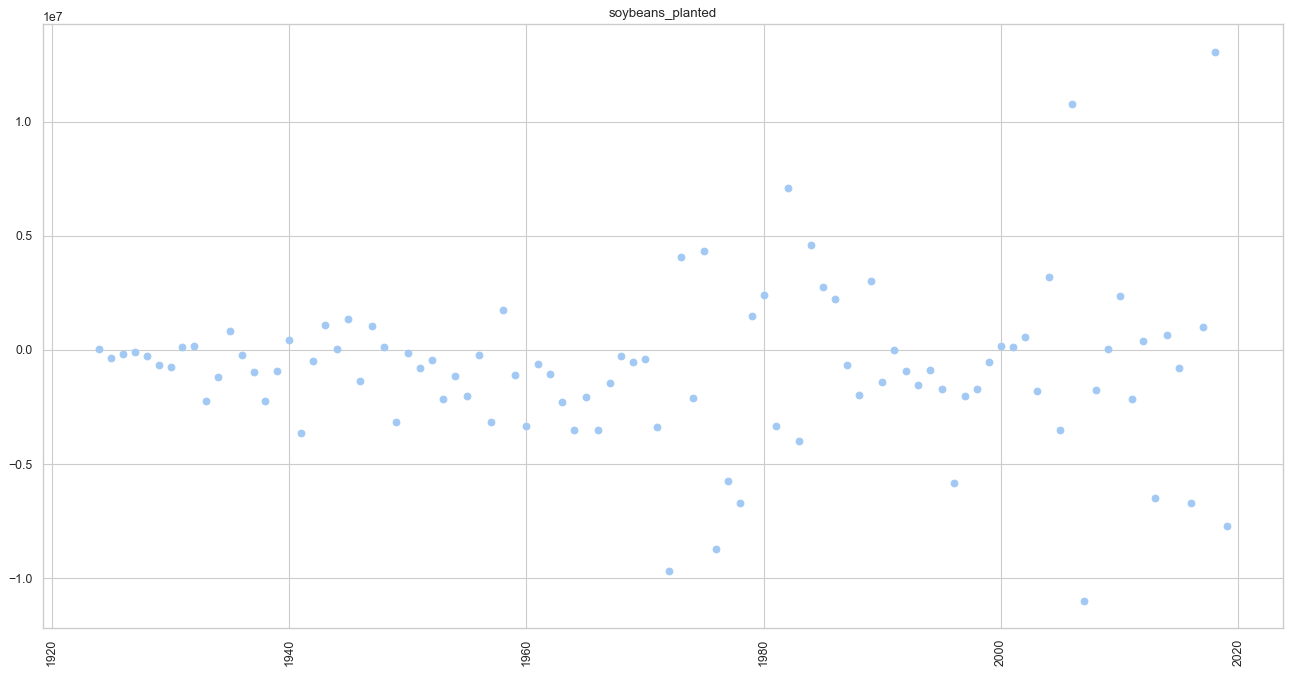

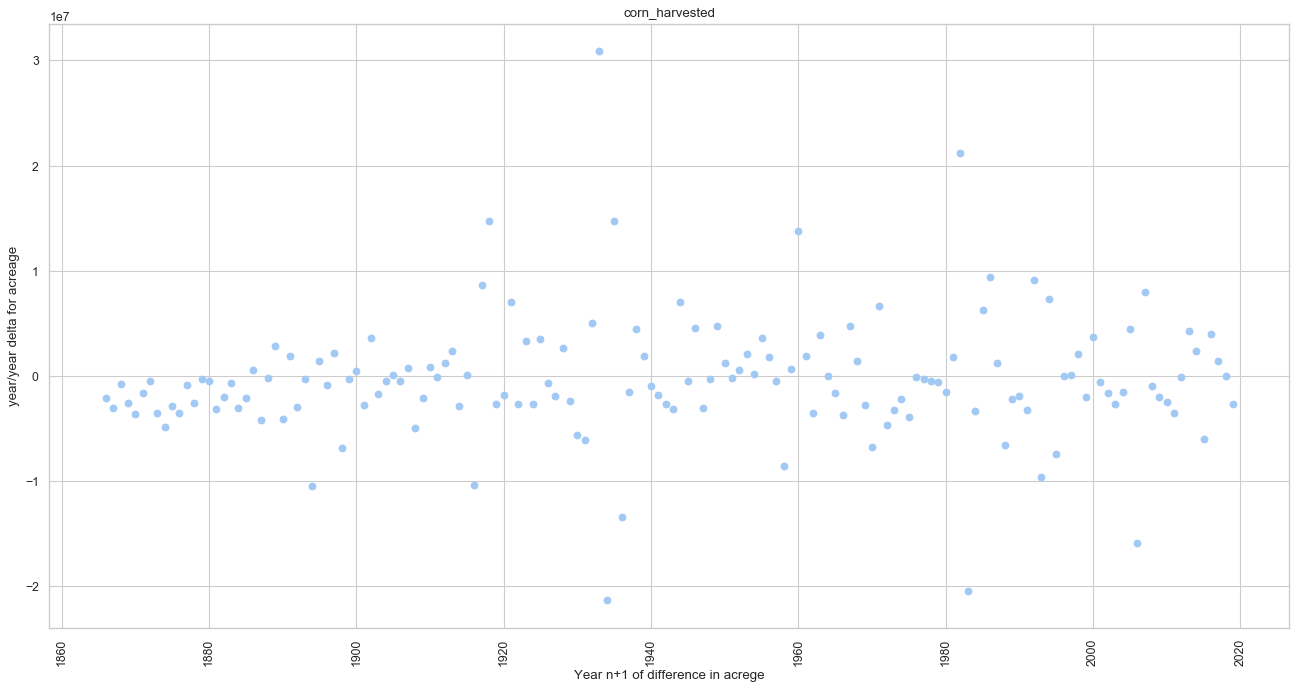

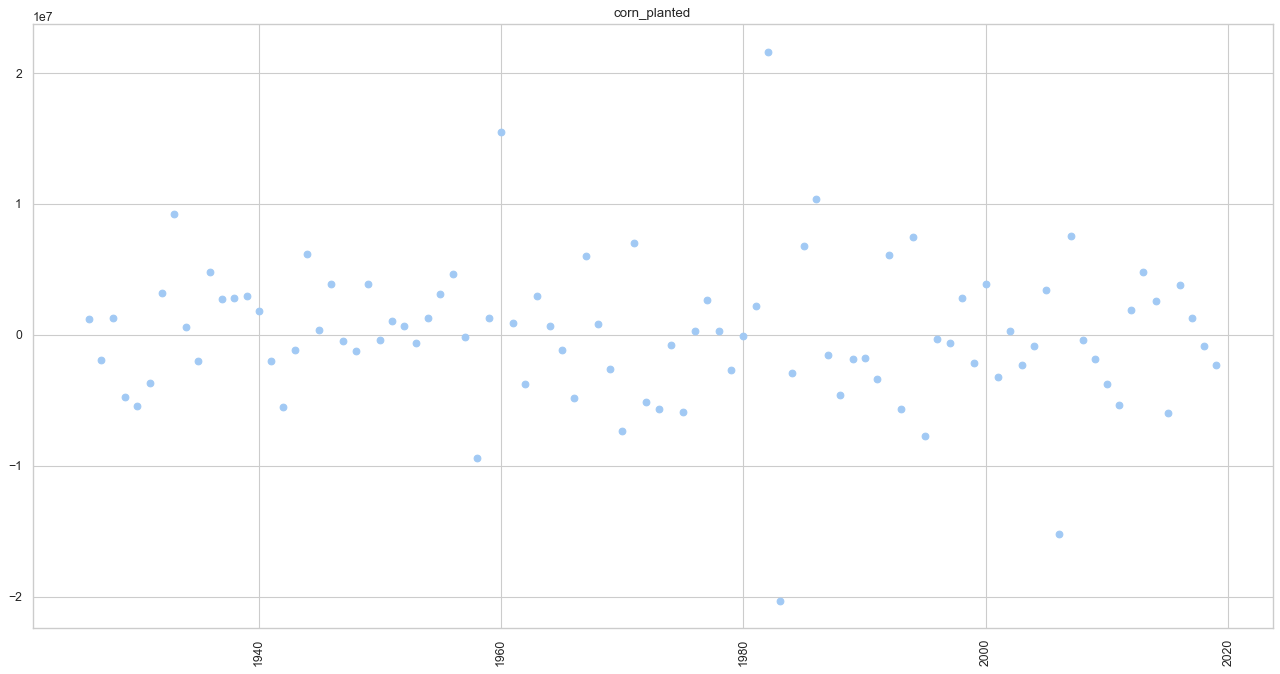

In [24]:
farm_planted_deltas = []
farm_harvested_deltas = []

'''
Extract the values for each indiviual action and each commodity.
Now we are able to get the deltas year over year for each of the eight 
scenarios we are interested in.

delta = value in year n - value in year n-1
'''

for val in comms.values():
    plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
    planted_delta = []
    harvested_delta = []
    title = val
    if 'planted' in val:
        planted_df = melt_df.loc[(melt_df.variable == val),['value','Year']]
        year = planted_df['Year'].tolist()
        planted_df = planted_df['value'].tolist()
        for idx,val in enumerate(planted_df):
            if idx !=0:
                delta = val - planted_df[idx-1]
                planted_delta.append(delta)
        farm_planted_deltas.append(planted_delta)
        plt.scatter(year[1:],planted_delta)
        plt.title(title)
        plt.xticks(rotation=90)
        plt.show()
    else:
        harvested_df = melt_df.loc[(melt_df.variable == val),['value','Year']]
        year = harvested_df['Year'].tolist()
        harvested_df = harvested_df['value'].tolist()
        for idx,val in enumerate(harvested_df):
            if idx !=0:
                delta = val - harvested_df[idx-1]
                harvested_delta.append(delta)
        farm_harvested_deltas.append(harvested_delta)
        plt.scatter(year[1:],harvested_delta)
        plt.title(title)
        plt.xticks(rotation=90)
        plt.ylabel('year/year delta for acreage')
        plt.xlabel('Year n+1 of difference in acrege')
        plt.show()

With these values extracted it was possible to graph the deltas year over year. So this visualization gave me an opprtunity to see if the deltas show any of the trends I saw in the large summary graph earlier. 

It answered some lingering qeustions.

Is this a viable project?
- Yes, the scatter plot shape shows that the planted deltas vary pretty wildly for crops that have the largest planting. 

What is casuing that fluctuation and is it represented in all crops?
- We don't know yet! Somethign has to be causing this fluctuation and it's represented in all the crops becasue it is visible that soybeans have little fluctuation when they are coming onto the market, but explode when they have lots of acreage. While cotton trends the other way as it loses acreage share. 


## Cleaning the Export Data

The export data came in a bit different format and required some extra steps to clean. I had to drop repeated data for years first before it was in a workable state. I then had to calculate the deltas year over year for each commodity in the same manner as before. I saved each commodity's deltas into it's own list initally to make them workable.

In [25]:
df = pd.read_csv('./export_comm2.csv')

values = []
corn, wheat, soybeans, cotton = [], [], [], []
years = []

drop_list = [year for idx,year in enumerate(df.columns[1:]) if idx%2 == 0]

df = df.drop(columns=drop_list).drop(0,axis=0)

for idx,year in enumerate(df.columns[1:]):
	df.rename({year:drop_list[idx]},axis=1,inplace=True)


melt_df = pd.melt(df, id_vars=['Product'],value_vars=df.columns[1:])

for idx,comm in enumerate(melt_df.Product):
	#needs to send to series
	if comm == 'Corn':
		corn.append(float(melt_df['value'][idx]))
		years.append(melt_df['variable'][idx])
	elif comm == 'Wheat':
		wheat.append(float(melt_df['value'][idx]))
	elif comm == 'Soybeans':
		soybeans.append(float(melt_df['value'][idx]))
	else:
		cotton.append(float(melt_df['value'][idx]))
        
corn_yoy = [val-corn[idx-1] for idx, val in enumerate(corn) if idx != 0]
wheat_yoy = [val-wheat[idx-1] for idx, val in enumerate(wheat) if idx != 0]
soy_yoy = [val-soybeans[idx-1] for idx, val in enumerate(soybeans) if idx != 0]
cotton_yoy = [val-cotton[idx-1] for idx, val in enumerate(cotton) if idx != 0]
      

I created a single list with all the values for the commodities extracted from USDA datasets to make plotting easier.

In [26]:
values.append(pd.Series(corn))
values.append(pd.Series(wheat))
values.append(pd.Series(soybeans))
values.append(pd.Series(cotton))

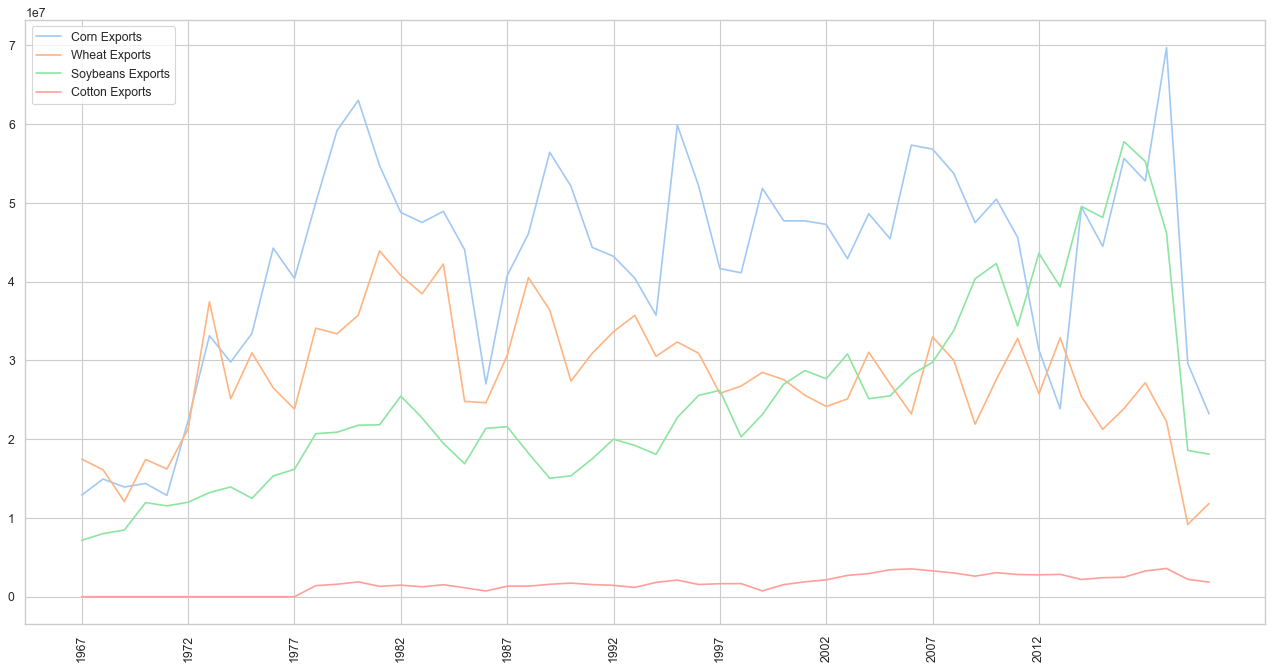

In [27]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(years,values[0], label="Corn Exports")
plt.plot(years,values[1], label="Wheat Exports")
plt.plot(years,values[2], label="Soybeans Exports")
plt.plot(years,values[3], label="Cotton Exports")
plt.xticks(np.arange(0,50,step=5),rotation=90)
plt.legend()

This graphic was intended to be a way to quickly assess what the raw export data showed. To see if using a line graph was the best way to show all the data together. Ultimately, while this showed how the four crops shared market share, I determined that trying to put all these lines on a single graph with the other data would be too confusing. You would not be able to see any useful trends or comparisons. So, I decided it was necessary to continue on assessing the deltas between the years to get the most insight becasue the line graphs do not show exactly any interaction betweent he exports and the acreage in any useful way. It still relies heavily on the user to be able to decipher lots of lines on a confusing graph.

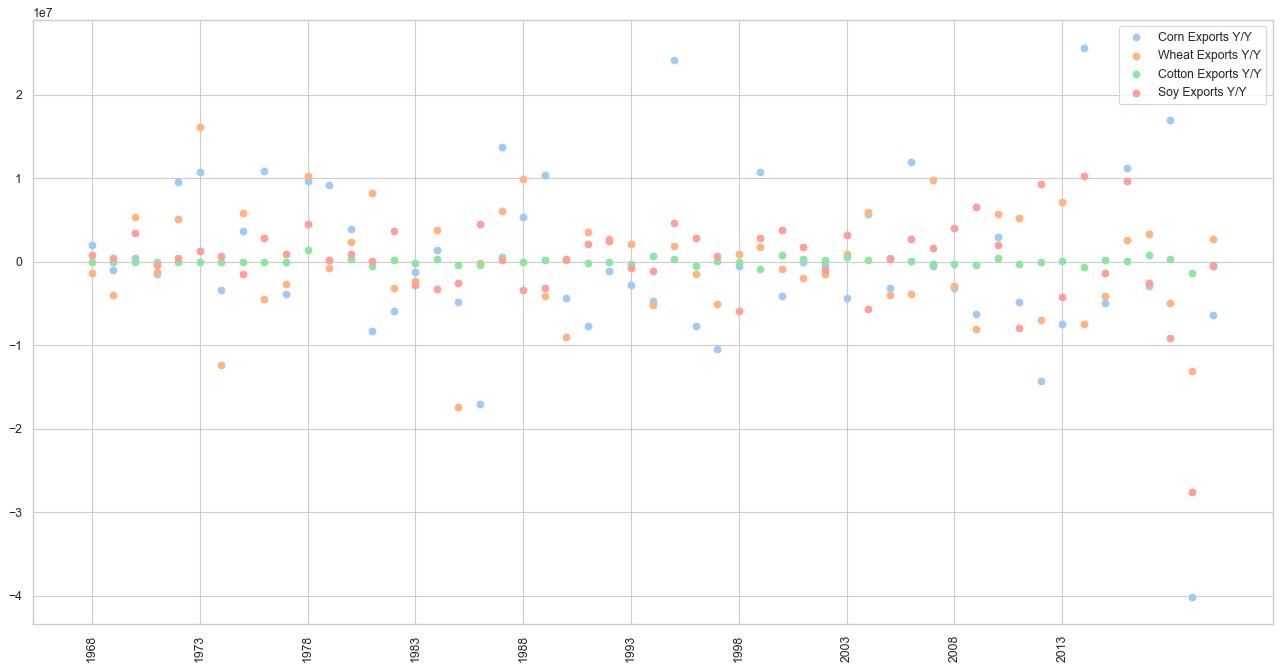

In [28]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
plt.scatter(years[1:],corn_yoy, label='Corn Exports Y/Y')
plt.scatter(years[1:],wheat_yoy, label='Wheat Exports Y/Y')
plt.scatter(years[1:],cotton_yoy, label='Cotton Exports Y/Y')
plt.scatter(years[1:],soy_yoy, label='Soy Exports Y/Y')
plt.xticks(np.arange(0,50,step=5),rotation=90)
plt.legend()
plt.show()

This scatter plot was an experiement to see if the amount of data in the export data set was too much to make a viable scatter plot. If this was determined to be too hard to decipher the larger data sets of the acreage data woudl definitely fail to be useful when laid ont he same graph. This appeared ot be ok at this point. By graphing the exports year over year on a single scatter plot the range can clearly be seen for how widly exports fluctuate. This an was interesting pattern, so I decided to pursue this method a bit further with the acreages as well.

## Compare Year Over Year Deltas For Farming and Exports

In [29]:
# order of lists in farm deltas, cotton, wheat, soy, corn
# print(farm_planted_deltas[2],farm_harvested_deltas[2])

planted_export_years = []
harvested_export_years = []

for idx,val in enumerate(farm_planted_deltas):
    farm_planted_deltas[idx].reverse()
for idx,val in enumerate(farm_harvested_deltas):
    farm_harvested_deltas[idx].reverse()
    
for idx,val in enumerate(farm_planted_deltas):
    top_range = len(farm_planted_deltas[idx])-2
    lower_range = top_range-51
    planted_export_years.append(farm_planted_deltas[idx][lower_range:top_range])
for idx,val in enumerate(farm_harvested_deltas):
    top_range = len(farm_harvested_deltas[idx])-2
    lower_range = top_range-51
    harvested_export_years.append(farm_harvested_deltas[idx][lower_range:top_range])
    
clean_years = years[1:52]

In [30]:
planted_export_years = []
harvested_export_years = []
for idx,val in enumerate(farm_planted_deltas):
    top_range = len(farm_planted_deltas[idx])-2
    lower_range = top_range-51
    planted_export_years.append(farm_planted_deltas[idx][lower_range:top_range])
for idx,val in enumerate(farm_harvested_deltas):
    top_range = len(farm_harvested_deltas[idx])-2
    lower_range = top_range-51
    harvested_export_years.append(farm_harvested_deltas[idx][lower_range:top_range])
    
clean_years = years[1:52]

In [31]:
'''
Building a new pandas dataframe with all the newly cleaned data 
from the export deltas, and acreage deltas.
'''

d = { 'year': clean_years,
    'cotton_harvest': harvested_export_years[0],
    'wheat_harvest': harvested_export_years[1],
    'soy_harvest': harvested_export_years[2],
    'corn_harvest': harvested_export_years[3],
    'cotton_planted': planted_export_years[0],
    'wheat_planted': planted_export_years[1],
    'soy_planted': planted_export_years[2],
    'corn_planted': planted_export_years[3],
    'cotton_export': cotton_yoy[:51], 
    'wheat_export': wheat_yoy[:51], 
    'soy_export': soy_yoy[:51], 
    'corn_export': corn_yoy[:51]
}
deltas_df = pd.DataFrame(data=d)
print(deltas_df.head())

   year  cotton_harvest  wheat_harvest  soy_harvest  corn_harvest  \
0  1968       1555300.0      3588000.0   -1586000.0     4714000.0   
1  1969      -2162000.0      7619000.0      54000.0     1406000.0   
2  1970       -891800.0      3582000.0    -912000.0    -2784000.0   
3  1971       -103900.0     -4121000.0    -456000.0    -6765000.0   
4  1972       -315900.0       382000.0   -2978000.0     6610000.0   

   cotton_planted  wheat_planted  soy_planted  corn_planted  cotton_export  \
0      -1463300.0      5404000.0   -1446000.0     6030000.0            0.0   
1       -969600.0      8410000.0    -269000.0      862000.0            0.0   
2        -62700.0      4711000.0    -548000.0    -2599000.0            0.0   
3       -409700.0     -5083000.0    -394000.0    -7316000.0            0.0   
4      -1646400.0     -1091000.0   -3390000.0     7053000.0            0.0   

   wheat_export  soy_export  corn_export  
0    -1356346.8    845322.0    2017606.1  
1    -4031859.2    454542.0   

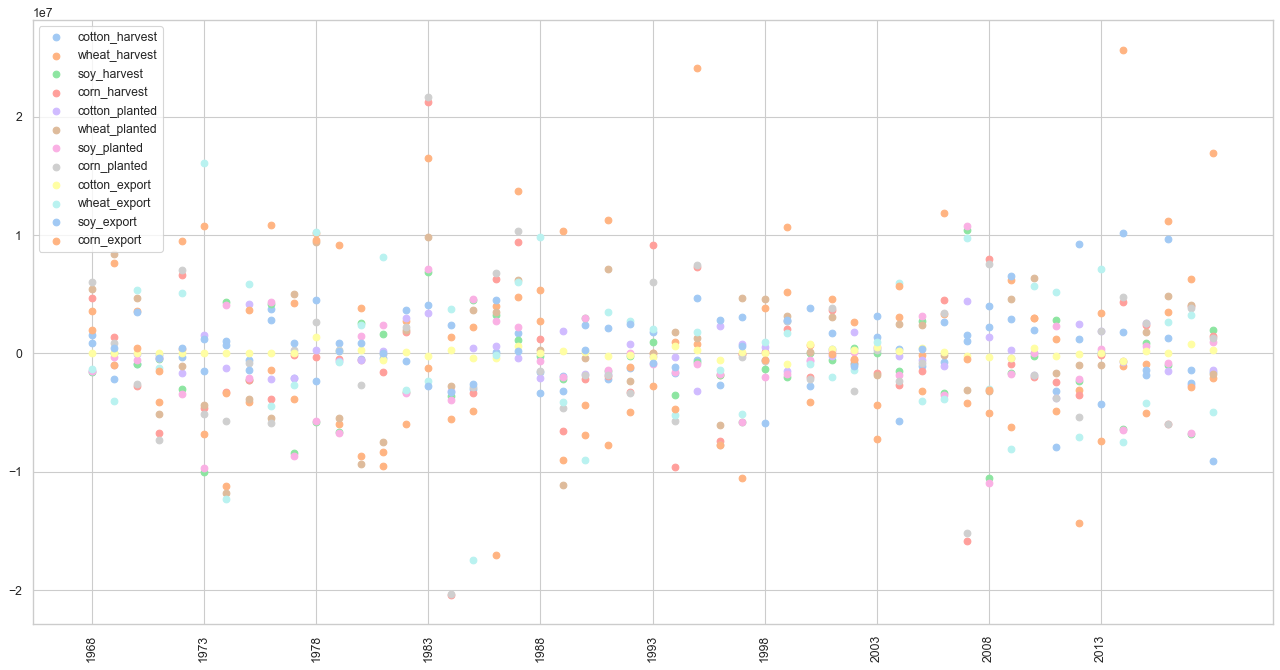

In [32]:
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
for col in deltas_df.columns:
    if col != 'year':
        plt.scatter(deltas_df['year'], deltas_df[col], label=col)
        plt.xticks(np.arange(0,50,step=5),rotation=90)
        plt.legend()

This graphic proved I was wrong in my previous assumption that it would be useful to show the ranges of all the deltas via scatter plot. There is simply too much data on this. It's impossible to detemine anything from this graphic by grouping these exclusively by the dataset. I realized some other categorization needs to be done. I realized I needed to reduce the dimensionality and try to produce a 1D graphic. Seeing that each year with multiple data points on it resembles a strip led me down this path. I also experimented with a line graph. This is equally as useless.

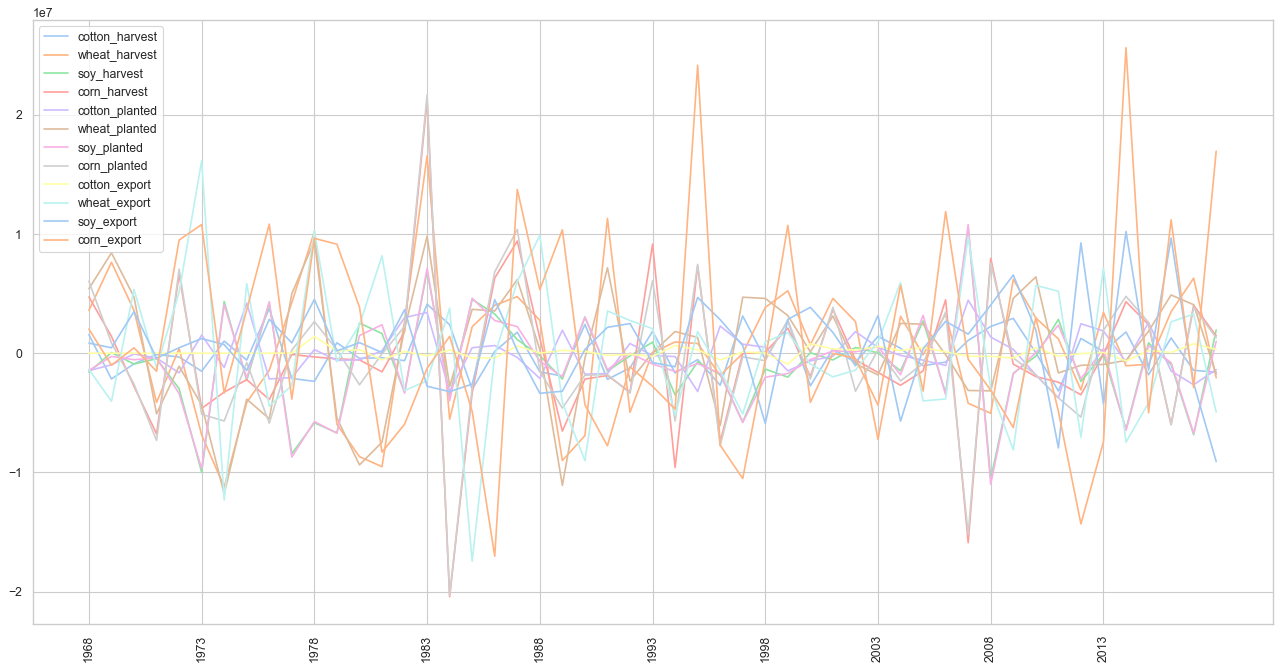

In [33]:

plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')

for idx,col in enumerate(deltas_df.columns):
    if col != 'year':
        plt.plot(deltas_df['year'], deltas_df[col], label=col)
        plt.xticks(np.arange(0,50,step=5),rotation=90)
        plt.legend()
#     print(col)
#     if 'soy' in col:
#         plt.plot(deltas_df['year'], deltas_df[col], label=col)
#         plt.xticks(np.arange(0,50,step=5),rotation=90)
#         plt.legend()
#         plt.show()
#     elif 'corn' in col:
#         plt.plot(deltas_df['year'], deltas_df[col], label=col)
#         plt.xticks(np.arange(0,50,step=5),rotation=90)
#         plt.legend()
#     elif 'cotton' in col:
#         plt.plot(deltas_df['year'], deltas_df[col], label=col)
#         plt.xticks(np.arange(0,50,step=5),rotation=90)
#         plt.legend()
#     elif 'wheat' in col:
#         plt.plot(deltas_df['year'], deltas_df[col], label=col)
#         plt.xticks(np.arange(0,50,step=5),rotation=90)
#         plt.legend()

## Melting the Delta DataFrame

I realized I needed to pivot the data in the deltas dataframe if I wanted to do any other useful visualizations. So, I created a new dataframe  with the nominal data for all the deltas categorized by commodirty and action. This would allow me to pull out specific groups much easier than before and to graph specific groups in a way I could not earlier.

In [34]:
melt_deltas_df = pd.melt(deltas_df, id_vars=['year'],value_vars=['cotton_harvest', 'wheat_harvest', 'soy_harvest', 'corn_harvest',
       'cotton_planted', 'wheat_planted', 'soy_planted', 'corn_planted',
       'cotton_export', 'wheat_export', 'soy_export', 'corn_export'])

comm_list = [i.split('_')[0] for i in melt_deltas_df['variable']]
action_list = [i.split('_')[1] for i in melt_deltas_df['variable']]
melt_deltas_df['commodity'] = comm_list
melt_deltas_df['action'] = action_list

print(melt_deltas_df.sample(20))

     year        variable      value commodity   action
125  1991     soy_harvest -1499000.0       soy  harvest
289  2002   wheat_planted  -886000.0     wheat  planted
386  1997    corn_planted  -308000.0      corn  planted
267  1980   wheat_planted -9364000.0     wheat  planted
523  1981      soy_export    51869.8       soy   export
93   2010   wheat_harvest  2958000.0     wheat  harvest
349  2011     soy_planted  2358000.0       soy  planted
217  1981  cotton_planted   203700.0    cotton  planted
537  1995      soy_export  4676577.0       soy   export
218  1982  cotton_planted  2984700.0    cotton  planted
164  1979    corn_harvest  -470000.0      corn  harvest
26   1994  cotton_harvest -1660000.0    cotton  harvest
7    1975  cotton_harvest  -576400.0    cotton  harvest
314  1976     soy_planted  4321000.0       soy  planted
105  1971     soy_harvest  -456000.0       soy  harvest
208  1972  cotton_planted -1646400.0    cotton  planted
340  2002     soy_planted   112000.0       soy  

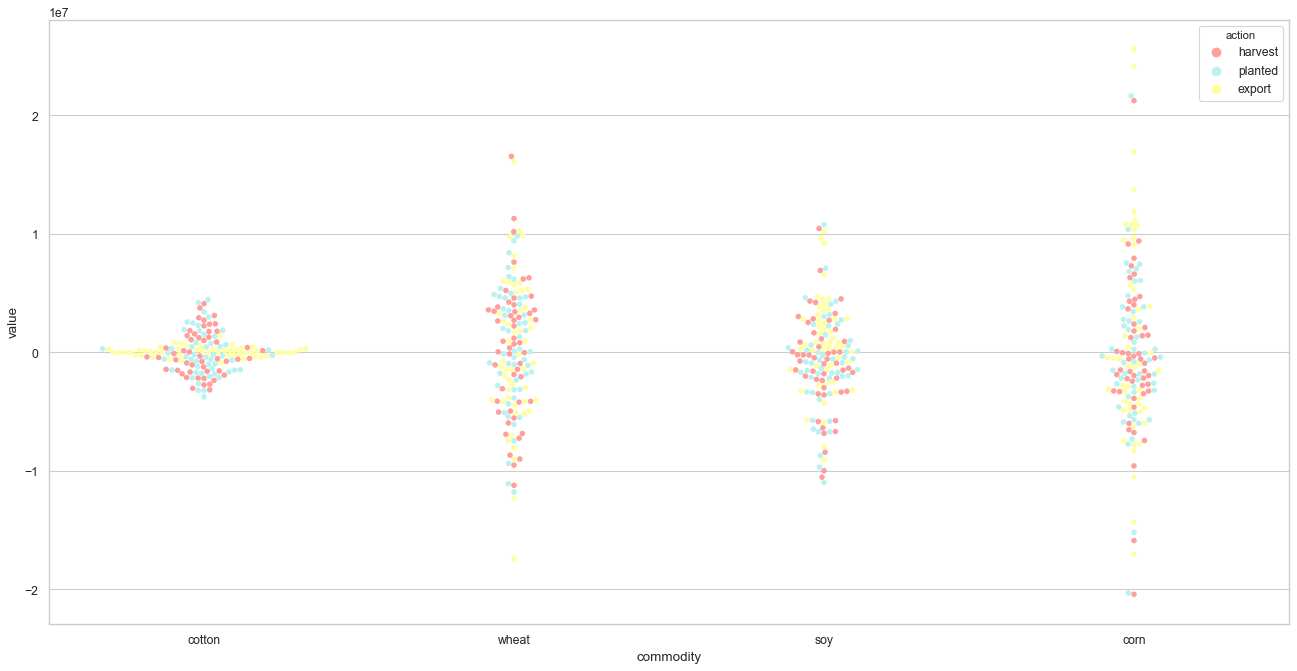

In [35]:
import seaborn as sns
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# Draw a nested violinplot and split the violins for easier comparison
plt.figure(num=None, figsize=(20, 10), dpi=80, facecolor='w', edgecolor='k')
# "Melt" the dataset to "long-form" or "tidy" representation

# Draw a categorical scatterplot to show each observation
sns.swarmplot(x="commodity", y="value", hue="action",
              palette=["r", "c", "y"], data=melt_deltas_df)

I was now experimenting with 1D visualization technqiues. Ultimately, this swarm plot was a significant improvement over the scatter plot and line plot becasue now we could clearly see some sort of shape in the data. The range of deltas was finally apparent and was starting to show it was consistent between action inside each type of crop. However, with the loss of time data it wasn't possible to draw any conclusions on impacts from export data on planted acreage. 

NameError: name 'ax' is not defined

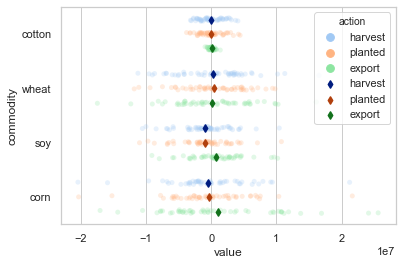

In [36]:
sns.despine(bottom=True, left=True)

# Show each observation with a scatterplot
sns.stripplot(x="value", y="commodity", hue="action",
              data=melt_deltas_df, dodge=True, alpha=.25, zorder=1)

# Show the conditional means
sns.pointplot(x="value", y="commodity", hue="action",
              data=melt_deltas_df, dodge=.532, join=False, palette="dark",
              markers="d", scale=.75, ci=None)

# Improve the legend 
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[3:], labels[3:], title="action",
          handletextpad=0, columnspacing=1,
          loc="lower right", ncol=3, frameon=True)

In an attempt to retain the simplicity of a 1D visualization I attempted a more refined strip plot for the deltas. I liked this more and it got a bit closer to showing some relation between the export data and the planted acreage. You were now able to see a totoal population mean for each action inside each data set for the crops which gave one more piece of useful data I did not get in the swarm plot. I was able to start to interpret that the crops where the export delta mean was higher were the crops still trending upward from the earlier graphs of raw acreage and export data over time. Which might be an answer to the previous question:

What phenomena is driving the increase in planeted acreage?

It appears that if the export demand population mean is higher than the planted acreage that it is still informing their decision to increase acreage when paired with the raw data over time. 

In [ ]:
import altair as alt
alt.Chart(melt_deltas_df).mark_tick().encode(
    x='value:Q',
    y='action:O'
)

In [ ]:
alt.Chart(melt_deltas_df).mark_tick().encode(
    x='value:Q',
    y='commodity:O'
)

In an effort to display the 1D data and try to dray some insights I created these two strip plots to explore if they were viable options based off the previous generated strip plot. The answer is no. I switched to using Altair instead of Seaborn becasue it had more options for data visualizations that lined up with me needs. However, this strip plot loses lots of information that is important to understand what we learned in the previous strip plot. You are forced to one dimension of the data either commodity or the action. You cannot tell anything useful about the values when the time and the action or commodity is stripped away, but this did lead me to the thought that a line graph may work the best becasue I started to try and think of ways to connect the marks across actions and kept coming back to time series resutls with years on the x axis. However, I had finally determined that actions was the ideal catorgical variable if I wanted to keep it simple. 

In [ ]:
'''
break melted data set in to four dataframes for simplicity of working with the data
'''

cotton_df = melt_deltas_df.loc[melt_deltas_df['commodity'] == 'cotton']
corn_df = melt_deltas_df.loc[melt_deltas_df['commodity'] == 'corn']
wheat_df = melt_deltas_df.loc[melt_deltas_df['commodity'] == 'wheat']
soy_df = melt_deltas_df.loc[melt_deltas_df['commodity'] == 'soy']
print(cotton_df)

In [ ]:
names = [soy_df,corn_df,cotton_df,wheat_df]
chart = []

soy = alt.Chart(soy_df).mark_tick().encode(
    x='year:O',
    y='action:O',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='plasma')),
).properties(
    width=600,
    height=300,
    title='Soy'
)

corn = alt.Chart(corn_df).mark_tick().encode(
    x='year:O',
    y='action:O',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='plasma')),
).properties(
    width=600,
    height=300,
    title='Corn'
)

wheat = alt.Chart(wheat_df).mark_tick().encode(
    x='year:O',
    y='action:O',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='plasma')),
).properties(
    width=600,
    height=300,
    title='Wheat'
)

cotton = alt.Chart(cotton_df).mark_tick().encode(
    x='year:O',
    y='action:O',
    color=alt.Color('value:Q', scale=alt.Scale(scheme='plasma')),
).properties(
    width=600,
    height=300,
    title='Cotton'
)

alt.VConcatChart(vconcat=(alt.hconcat(corn,soy),alt.hconcat(cotton,wheat))).configure_mark(
    height=50
)


I tried one last way of displaying the data in a simple strip plot this time assign the year to the x axis and setting the value of the observation to the color encoding. This was closer to my ultimate goal, but the gradient was to granular becasue the range was so big for each action. It basically became impossible to comapre across the actions even though I had now gotten to a workable 1D visualization. Unfortunately there ws not good way to go on from here in the time I had left. So, I committed to visualizing my cleaned and analyzed data via 4 line graphs grouped by commoditiy with each action given it's own visual encoding.

In [ ]:
cotton = alt.Chart(cotton_df).mark_line().encode(
    x='year:O',
    y='value:Q',
    color=alt.Color('variable:N', scale=alt.Scale(scheme='category10')),
    opacity=alt.value(1.0)).properties(
     width=500,
    height=300,
    title='Cotton'
)
corn = alt.Chart(corn_df).mark_line().encode(
    x='year:O',
    y='value:Q',
    color=alt.Color('variable:N', scale=alt.Scale(scheme='category10')),
    opacity=alt.value(1.0)).properties(
     width=500,
    height=300,
    title='Corn'
)
soy = alt.Chart(soy_df).mark_line().encode(
    x='year:O',
    y='value:Q',
    color=alt.Color('variable:N', scale=alt.Scale(scheme='category10')),
    opacity=alt.value(1.0)).properties(
     width=500,
    height=300,
    title='Soy'
)
wheat = alt.Chart(wheat_df).mark_line().encode(
    x='year:O',
    y='value:Q',
    color=alt.Color('variable:N', scale=alt.Scale(scheme='category10')),
    opacity=alt.value(1.0)).properties(
    width=500,
    height=300,
    title='Wheat'
)
alt.VConcatChart(vconcat=(alt.hconcat(corn,soy),alt.hconcat(cotton,wheat)))

Finally this end visualization was the best way I could determine to comapre year over year exactly what impact the export changes where having on the planting patterns of the farms. You are able to see all the time series data for the shared years, you are able to see each of the three actions of interest on one graph, and they are broken down to individual graphs for each commodity. It is now easy enough to draw some conclusions on the pattens by tracking the lines for export and planted actions.